In [ ]:
# in this notebook varya is trying to add elevation to the netcdf data: 

# 
# 

In [66]:
import xarray as xr

In [106]:
geopotential = xr.open_dataset('elevation/geopotential.nc')
# units m**2 s**-2
# The geopotential height can be calculated by dividing the geopotential 
# by the Earth's gravitational acceleration, g (= 9.80665 m s-2). 
geopotential['z'] = geopotential['z'] / 9.81

In [68]:
# geopotential.z.values.max()

In [69]:
# geopotential

In [144]:
era5 = xr.open_dataset('era5_resampled_to_annual/total_precipitation_annual_sum_1979to2020.nc')

In [145]:
# add elevation:

era5['z'] = geopotential['z'] # data array 
# era5 = era5.expand_dims(geopotential['z'])

In [147]:
era5 = era5.where(era5.z > 1000, drop=True)

era5

<xarray.Dataset>
Dimensions:    (year: 42, latitude: 84, longitude: 136, expver: 2, time: 1)
Coordinates:
  * longitude  (longitude) float32 55.0 55.5 56.0 56.5 ... 121.5 122.0 122.5
  * latitude   (latitude) float32 55.0 54.5 54.0 53.5 ... 14.5 12.0 11.5 6.0
  * year       (year) int32 1979 1980 1981 1982 1983 ... 2017 2018 2019 2020
  * time       (time) datetime64[ns] 2013-08-09T12:00:00
Dimensions without coordinates: expver
Data variables:
    tp         (year, latitude, longitude, expver, time) float32 nan nan ... nan
    z          (time, latitude, longitude) float64 nan nan nan ... nan nan nan
Attributes:
    units:    m
    method:   annual sum from raw hourly era5 data

In [148]:
import geopandas as gpd 

hma = gpd.read_file('HMA_regions/HMA_regions.shp')


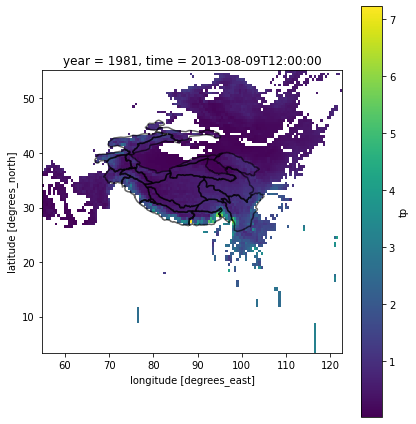

In [149]:
import matplotlib.pyplot as plt

era52 = era5.isel(year=2)

fig, ax = plt.subplots(figsize=(6, 6))
era52.tp[:,:,1].plot()#palette='viridis')
hma.boundary.plot(ax=ax, alpha=.6, color='black')
fig.tight_layout()

In [140]:
era51

<xarray.Dataset>
Dimensions:    (longitude: 277, latitude: 197, expver: 2, time: 1)
Coordinates:
  * longitude  (longitude) float32 55.0 55.25 55.5 55.75 ... 123.5 123.8 124.0
  * latitude   (latitude) float32 55.0 54.75 54.5 54.25 ... 6.75 6.5 6.25 6.0
    year       int32 1981
  * time       (time) datetime64[ns] 2013-08-09T12:00:00
Dimensions without coordinates: expver
Data variables:
    tp         (latitude, longitude, expver) float32 ...
    z          (time, latitude, longitude) float64 147.2 nan 112.5 ... nan 17.86
Attributes:
    units:    m
    method:   annual sum from raw hourly era5 data